In [39]:
import tensorflow as tf
import tensorflow.keras as k 
import cv2
import matplotlib.pyplot as plt


In [40]:
(Xtrain,Ytrain),(Xtest,Ytest) = k.datasets.cifar10.load_data()
labels = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [41]:
def display(Xdata,Ydata,size,labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        img = cv2.resize(Xdata[i],(size,size))
        plt.imshow(img)
        plt.xlabel(labels[Ydata[i][0]])

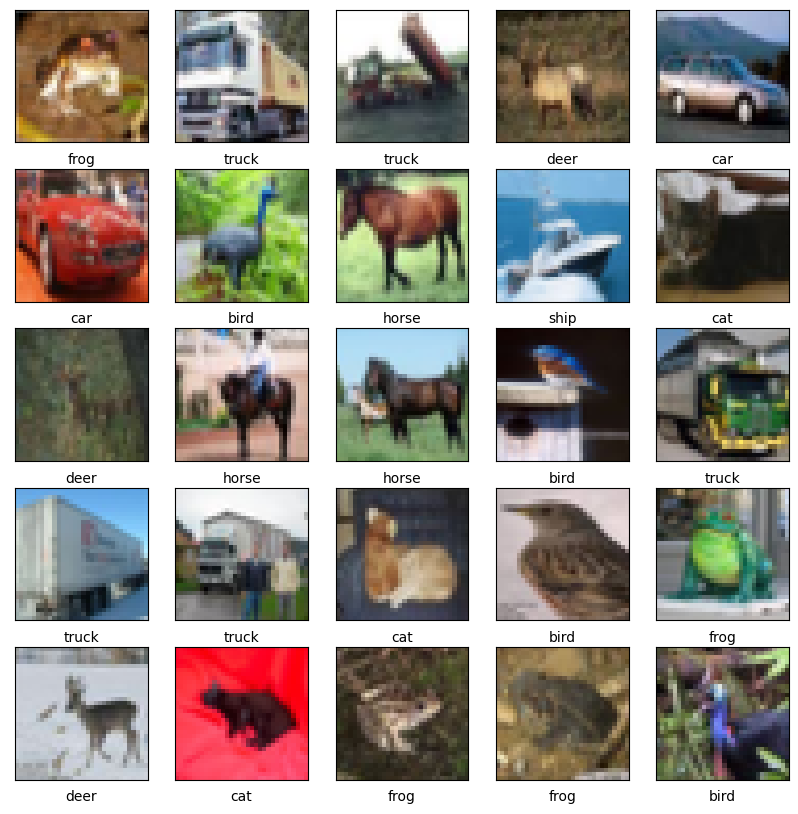

In [42]:
display(Xtrain,Ytrain,32,labels)

In [43]:
def createCNN_Model():
    model = k.models.Sequential()
    model.add(k.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
    model.add(k.layers.AveragePooling2D((2,2)))
    model.add(k.layers.Conv2D(32,(3,3),activation='relu'))
    model.add(k.layers.Dropout(0.2))
    model.add(k.layers.AveragePooling2D((2,2)))
    model.add(k.layers.Conv2D(32,(3,3),activation='relu'))
    model.add(k.layers.Dropout(0.2))
    model.add(k.layers.Flatten())
    model.add(k.layers.Dense(64,activation='relu'))
    model.add(k.layers.Dense(10))

    model.summary()
    return model

In [44]:
myModel = createCNN_Model()
myModel.compile(optimizer='adam',
                loss= k.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy']) 
history = myModel.fit(Xtrain,Ytrain, epochs=20)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d_9 (Averag  (None, 15, 15, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 average_pooling2d_10 (Avera  (None, 6, 6, 32)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 32)         